In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Translation

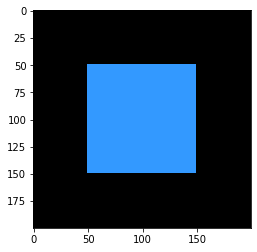

In [2]:
image = np.zeros((200,200,3),dtype = 'float32')
image[50:150,50:150,0] = 1
image[50:150,50:150,1] = 0.6
image[50:150,50:150,2] = 0.2
plt.imshow(image[:,:,::-1])

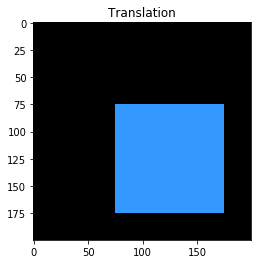

In [3]:
output_dim = image.shape[:2]

warp_mat = np.float32([[1.0,0,25],
                       [0,1.0,25]])

output = cv2.warpAffine(image,warp_mat,output_dim)
plt.imshow(output[:,:,::-1]);
plt.title("Translation");

### Scaling

Text(0.5, 1.0, 'Scaling')

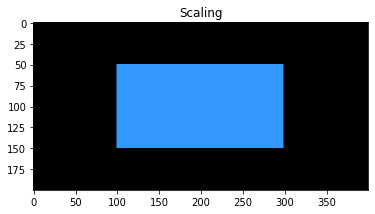

In [4]:
warp_mat = np.float32([[2.0,0,0],
                      [0,1.0,0]])

output = cv2.warpAffine(image,warp_mat,(2*output_dim[0],output_dim[1]))

plt.imshow(output[:,:,::-1]);
plt.title("Scaling")

### Rotation

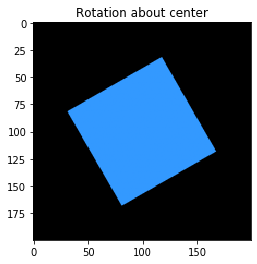

In [5]:
#Rotating about center
angle_deg = 30
angle_rad = 30*np.pi/180

cos_theta = np.cos(angle_rad)
sin_theta = np.sin(angle_rad)

centerx = image.shape[1]//2
centery = image.shape[0]//2

tx = centerx*(1- cos_theta)- centery*sin_theta
ty = centerx*sin_theta + centery*(1-cos_theta)

warp_mat = np.float32([[cos_theta,sin_theta,tx],
                      [-sin_theta,cos_theta,ty]])

output = cv2.warpAffine(image,warp_mat,output_dim)

plt.imshow(output[:,:,::-1]);
plt.title("Rotation about center");

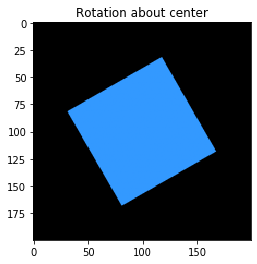

In [6]:
#another way
warp_mat = cv2.getRotationMatrix2D((centerx,centery),angle_deg,1)

output = cv2.warpAffine(image,warp_mat,output_dim)

plt.imshow(output[:,:,::-1]);
plt.title("Rotation about center");

### Shear transformation

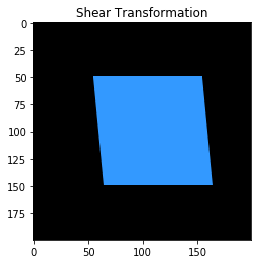

In [7]:
warp_mat =  np.float32([[1.0,0.1,0],
                       [0,1.0,0]])

output = cv2.warpAffine(image,warp_mat,output_dim)

plt.imshow(output[:,:,::-1]);
plt.title("Shear Transformation");

### Complex Transformations

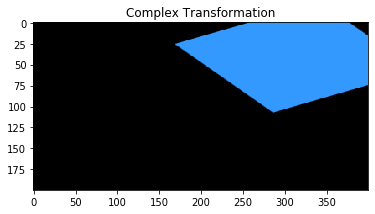

In [8]:
scale_mat = np.float32([[2.0,0],
                      [0,1.0]])

rotation_mat = np.float32([[cos_theta,sin_theta],
                      [-sin_theta,cos_theta]])

shear_mat = np.float32([[1.0,0.1],
                       [0,1.0]])

trans_mat = np.float32([[25],
                       [10]])

complex_mat = np.dot(np.dot(scale_mat,rotation_mat),shear_mat)

warp_mat = np.hstack([complex_mat,trans_mat])

output = cv2.warpAffine(image,warp_mat,(2*output_dim[0],output_dim[1]))

plt.imshow(output[:,:,::-1]);
plt.title("Complex Transformation");

### Complex Transformation by specifying points

In [9]:
src_points = np.float32([[50, 50],[50, 149],[149, 50]])
dst_points = np.float32([[68, 45],[76, 155],[176, 27]])

warp_mat ,_ = cv2.estimateAffine2D(src_points,dst_points)

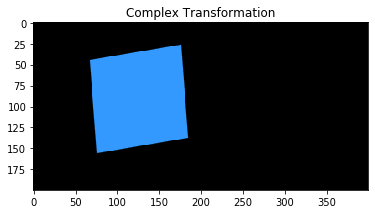

In [10]:
output = cv2.warpAffine(image,warp_mat,(2*output_dim[0],output_dim[1]))

plt.imshow(output[:,:,::-1]);
plt.title("Complex Transformation");

### Homography

In [11]:
image_hom = np.zeros((200, 200, 3), dtype = np.float32)
src_points = np.float32([[50, 50],[50, 149],[149, 149], [149, 50]])
dst_points = np.float32([[75, 50],[50, 149], [149, 149], [124, 50]])
cv2.fillConvexPoly(image_hom, np.int32(dst_points), (1.0, 0.6, 0.2), cv2.LINE_AA);

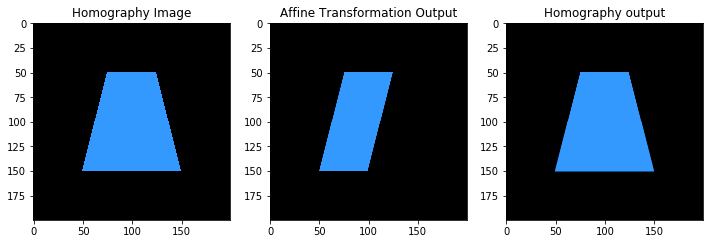

In [12]:
plt.figure(figsize = (12,12))

plt.subplot(131)
plt.imshow(image_hom[:,:,::-1]);
plt.title("Homography Image")

plt.subplot(132)
warp_mat ,_ = cv2.estimateAffine2D(src_points,dst_points)
output_aff = cv2.warpAffine(image,warp_mat,output_dim)
plt.imshow(output_aff[:,:,::-1]);
plt.title("Affine Transformation Output")

plt.subplot(133)
hom_mat ,_ = cv2.findHomography(src_points,dst_points)
output_hom = cv2.warpPerspective(image,hom_mat,output_dim) 
plt.imshow(output_hom[:,:,::-1]);
plt.title("Homography output");

### ORB 

In [13]:
orb = cv2.ORB_create()

In [14]:
image = cv2.imread("../data/images/book.jpeg")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [15]:
key_pts = orb.detect(image_gray)

In [16]:
key_pts,des = orb.compute(image_gray,key_pts)

In [19]:
output = cv2.drawKeypoints(image,key_pts,None,(0,255,0),flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

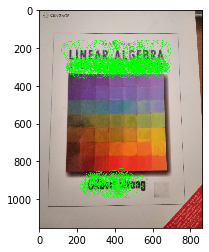

In [20]:
plt.imshow(output[:,:,::-1])

In [21]:
orb = cv2.ORB_create(10)

In [23]:
key_pts,des = orb.detectAndCompute(image_gray,None)

In [24]:
output = cv2.drawKeypoints(image,key_pts,None,(0,255,0),flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

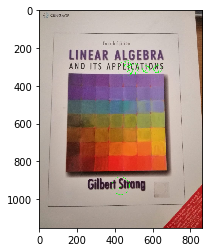

In [25]:
plt.imshow(output[:,:,::-1])

### Feature Matching

In [29]:
book_image = cv2.imread("../data/images/book.jpeg",0)
book_scene_image = cv2.imread("../data/images/book_scene.jpeg",0)

In [31]:
orb = cv2.ORB_create()

In [32]:
key_pts1, des1 = orb.detectAndCompute(book_image,None)
key_pts2, des2 = orb.detectAndCompute(book_scene_image,None)

In [33]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,True)

In [34]:
matches = bf.match(des1,des2)

In [38]:
matches = sorted(matches,key = lambda x : x.distance)

In [39]:
output = cv2.drawMatches(book_image,key_pts1,book_scene_image,key_pts2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

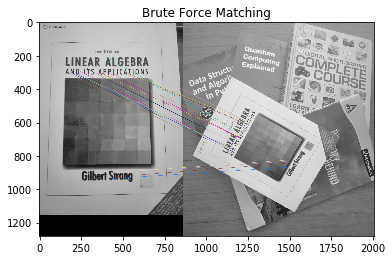

In [41]:
plt.imshow(output);
plt.title("Brute Force Matching");

In [43]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params = dict(checks = 100)

In [44]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [46]:
matches = flann.knnMatch(des1,des2,2)

In [47]:
output = cv2.drawMatchesKnn(book_image,key_pts1,book_scene_image,key_pts2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

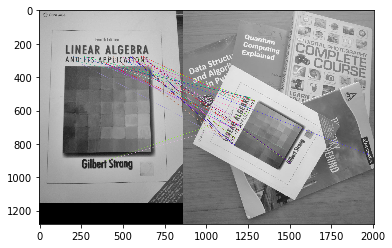

In [48]:
plt.imshow(output)